**Step 1:Importing necessary Libraries**

In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator

**Step 2:Loading the Data from the Dataset**

In [3]:
from google.colab import drive

In [4]:
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
train_data_dir = '/content/drive/MyDrive/MRI Brain Tumor Classification/train'
valid_data_dir = '/content/drive/MyDrive/MRI Brain Tumor Classification/valid'

**Step 3:Data Preprocessing**

In [6]:
img_width, img_height = 128, 128
batch_size = 32

# Create ImageDataGenerator for data augmentation and normalization
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

valid_datagen = ImageDataGenerator(rescale=1.0/255)

# Generate training and validation datasets
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary'
)

valid_generator = valid_datagen.flow_from_directory(
    valid_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary'
)

Found 253 images belonging to 2 classes.
Found 253 images belonging to 2 classes.


**Step 4:Creating Model**

**Model 1:Sequential Model**

In [7]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 14, 14, 128)       0

**Method 2:Functional API model**

In [8]:
from keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, concatenate
input_layer = Input(shape=(img_width, img_height, 3))

# Branch 1
conv1 = Conv2D(32, (3, 3), activation='relu')(input_layer)
pool1 = MaxPooling2D((2, 2))(conv1)

# Branch 2
conv2 = Conv2D(64, (3, 3), activation='relu')(input_layer)
pool2 = MaxPooling2D((2, 2))(conv2)

# Merge branches
merged = concatenate([pool1, pool2])

flatten = Flatten()(merged)
dense1 = Dense(128, activation='relu')(flatten)
dropout = Dropout(0.5)(dense1)
output_layer = Dense(1, activation='sigmoid')(dropout)

model2 = Model(inputs=input_layer, outputs=output_layer)
model2.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 128, 128, 3)]        0         []                            
                                                                                                  
 conv2d_3 (Conv2D)           (None, 126, 126, 32)         896       ['input_1[0][0]']             
                                                                                                  
 conv2d_4 (Conv2D)           (None, 126, 126, 64)         1792      ['input_1[0][0]']             
                                                                                                  
 max_pooling2d_3 (MaxPoolin  (None, 63, 63, 32)           0         ['conv2d_3[0][0]']            
 g2D)                                                                                         

**Method 3 :Advanced CNN Model**

In [9]:
model3_advanced_cnn = models.Sequential()
model3_advanced_cnn.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)))
model3_advanced_cnn.add(layers.MaxPooling2D((2, 2)))

model3_advanced_cnn.add(layers.Conv2D(64, (3, 3), activation='relu'))
model3_advanced_cnn.add(layers.MaxPooling2D((2, 2)))

model3_advanced_cnn.add(layers.Conv2D(128, (3, 3), activation='relu'))
model3_advanced_cnn.add(layers.MaxPooling2D((2, 2)))

model3_advanced_cnn.add(layers.Conv2D(256, (3, 3), activation='relu'))
model3_advanced_cnn.add(layers.MaxPooling2D((2, 2)))

model3_advanced_cnn.add(layers.Flatten())
model3_advanced_cnn.add(layers.Dense(512, activation='relu'))
model3_advanced_cnn.add(layers.Dropout(0.5))
model3_advanced_cnn.add(layers.Dense(1, activation='sigmoid'))
model3_advanced_cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 63, 63, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 14, 14, 128)      

**Method 4:Transfer Learning with DenseNet**

In [10]:
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

# Load pre-trained DenseNet model
base_model_densenet = DenseNet121(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))

# Freeze the layers of the pre-trained model
for layer in base_model_densenet.layers:
    layer.trainable = False

# Add custom fully connected layers for your specific task
x = base_model_densenet.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dense(256, activation='relu')(x)
predictions_densenet = Dense(1, activation='sigmoid')(x)

# Create the transfer learning model
model4_densenet = Model(inputs=base_model_densenet.input, outputs=predictions_densenet)

29084464/29084464 [==============================] - 0s 0us/step


**Step 5:Compiling and Training the model**

**Model 1:Sequential Model**

In [11]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Model training
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=20,  # Increased the number of epochs
    validation_data=valid_generator,
    validation_steps=valid_generator.samples // batch_size
)

Epoch 1/20
7/7 [==============================] - 65s 10s/step - loss: 0.6511 - accuracy: 0.6290 - val_loss: 0.5657 - val_accuracy: 0.7589
Epoch 2/20
7/7 [==============================] - 6s 837ms/step - loss: 0.5855 - accuracy: 0.7285 - val_loss: 0.5198 - val_accuracy: 0.7768
Epoch 3/20
7/7 [==============================] - 7s 1s/step - loss: 0.5505 - accuracy: 0.7285 - val_loss: 0.4948 - val_accuracy: 0.7857
Epoch 4/20
7/7 [==============================] - 7s 1s/step - loss: 0.5712 - accuracy: 0.7285 - val_loss: 0.4980 - val_accuracy: 0.7723
Epoch 5/20
7/7 [==============================] - 6s 893ms/step - loss: 0.5484 - accuracy: 0.7723 - val_loss: 0.4831 - val_accuracy: 0.7946
Epoch 6/20
7/7 [==============================] - 7s 967ms/step - loss: 0.5207 - accuracy: 0.7557 - val_loss: 0.4684 - val_accuracy: 0.7902
Epoch 7/20
7/7 [==============================] - 7s 1s/step - loss: 0.5519 - accuracy: 0.7330 - val_loss: 0.5044 - val_accuracy: 0.7545
Epoch 8/20
7/7 [==============

**Method 2:Functional API Model**

In [12]:
model2.compile(optimizer='adam',
               loss='binary_crossentropy',
               metrics=['accuracy'])

# Model training
history2 = model2.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=15,
    validation_data=valid_generator,
    validation_steps=valid_generator.samples // batch_size
)

Epoch 1/15
7/7 [==============================] - 11s 1s/step - loss: 7.6073 - accuracy: 0.5973 - val_loss: 3.6659 - val_accuracy: 0.6518
Epoch 2/15
7/7 [==============================] - 9s 1s/step - loss: 3.2342 - accuracy: 0.5928 - val_loss: 1.3462 - val_accuracy: 0.7143
Epoch 3/15
7/7 [==============================] - 10s 1s/step - loss: 1.0279 - accuracy: 0.7059 - val_loss: 0.5253 - val_accuracy: 0.7589
Epoch 4/15
7/7 [==============================] - 10s 1s/step - loss: 0.7215 - accuracy: 0.6425 - val_loss: 0.5030 - val_accuracy: 0.7723
Epoch 5/15
7/7 [==============================] - 10s 1s/step - loss: 0.6191 - accuracy: 0.6606 - val_loss: 0.5064 - val_accuracy: 0.7768
Epoch 6/15
7/7 [==============================] - 9s 1s/step - loss: 0.5637 - accuracy: 0.7602 - val_loss: 0.4948 - val_accuracy: 0.7857
Epoch 7/15
7/7 [==============================] - 10s 1s/step - loss: 0.5801 - accuracy: 0.7149 - val_loss: 0.4791 - val_accuracy: 0.7812
Epoch 8/15
7/7 [====================

**Method 3:Advanced CNN Model**

In [44]:
model3_advanced_cnn.compile(optimizer='adam',
                           loss='binary_crossentropy',
                           metrics=['accuracy'])

# Model training
history_advanced_cnn = model3_advanced_cnn.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=20,
    validation_data=valid_generator,
    validation_steps=valid_generator.samples // batch_size
)

Epoch 1/20
7/7 [==============================] - 9s 1s/step - loss: 0.0559 - accuracy: 0.9774 - val_loss: 0.0049 - val_accuracy: 0.9955
Epoch 2/20
7/7 [==============================] - 8s 1s/step - loss: 0.0511 - accuracy: 0.9777 - val_loss: 0.0514 - val_accuracy: 0.9777
Epoch 3/20
7/7 [==============================] - 7s 990ms/step - loss: 0.0853 - accuracy: 0.9683 - val_loss: 0.0074 - val_accuracy: 1.0000
Epoch 4/20
7/7 [==============================] - 7s 1s/step - loss: 0.0506 - accuracy: 0.9864 - val_loss: 0.0171 - val_accuracy: 0.9955
Epoch 5/20
7/7 [==============================] - 9s 1s/step - loss: 0.0266 - accuracy: 0.9955 - val_loss: 0.0097 - val_accuracy: 0.9955
Epoch 6/20
7/7 [==============================] - 7s 1s/step - loss: 0.0341 - accuracy: 0.9911 - val_loss: 0.0013 - val_accuracy: 1.0000
Epoch 7/20
7/7 [==============================] - 8s 1s/step - loss: 0.0092 - accuracy: 1.0000 - val_loss: 0.0011 - val_accuracy: 1.0000
Epoch 8/20
7/7 [======================

**Method 4:Transfer Learning with DenseNet**

In [19]:
from tensorflow.keras.optimizers import Adam
# Compile the model
model4_densenet.compile(optimizer=Adam(lr=0.0001),
                      loss='binary_crossentropy',
                      metrics=['accuracy'])

# Train the model
history_densenet = model4_densenet.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=10,
    validation_data=valid_generator,
    validation_steps=valid_generator.samples // batch_size
)

Epoch 1/10
7/7 [==============================] - 22s 2s/step - loss: 1.2163 - accuracy: 0.5747 - val_loss: 0.4946 - val_accuracy: 0.7366
Epoch 2/10
7/7 [==============================] - 18s 3s/step - loss: 0.5518 - accuracy: 0.7376 - val_loss: 0.4280 - val_accuracy: 0.8304
Epoch 3/10
7/7 [==============================] - 18s 3s/step - loss: 0.4042 - accuracy: 0.8371 - val_loss: 0.3726 - val_accuracy: 0.8259
Epoch 4/10
7/7 [==============================] - 15s 2s/step - loss: 0.3454 - accuracy: 0.8571 - val_loss: 0.3013 - val_accuracy: 0.8795
Epoch 5/10
7/7 [==============================] - 14s 2s/step - loss: 0.3371 - accuracy: 0.8507 - val_loss: 0.3114 - val_accuracy: 0.8527
Epoch 6/10
7/7 [==============================] - 14s 2s/step - loss: 0.2843 - accuracy: 0.8597 - val_loss: 0.2190 - val_accuracy: 0.9330
Epoch 7/10
7/7 [==============================] - 18s 3s/step - loss: 0.2525 - accuracy: 0.9050 - val_loss: 0.2243 - val_accuracy: 0.9107
Epoch 8/10
7/7 [==================

**Step 5:Evaluation of Models and Plot**

**Model 1:Sequential Model**

In [20]:
accuracy = model.evaluate(valid_generator, steps=valid_generator.samples // batch_size)[1]
print(f"Validation Accuracy: {accuracy * 100:.2f}%")

7/7 [==============================] - 2s 201ms/step - loss: 0.3889 - accuracy: 0.8438
Validation Accuracy: 84.38%


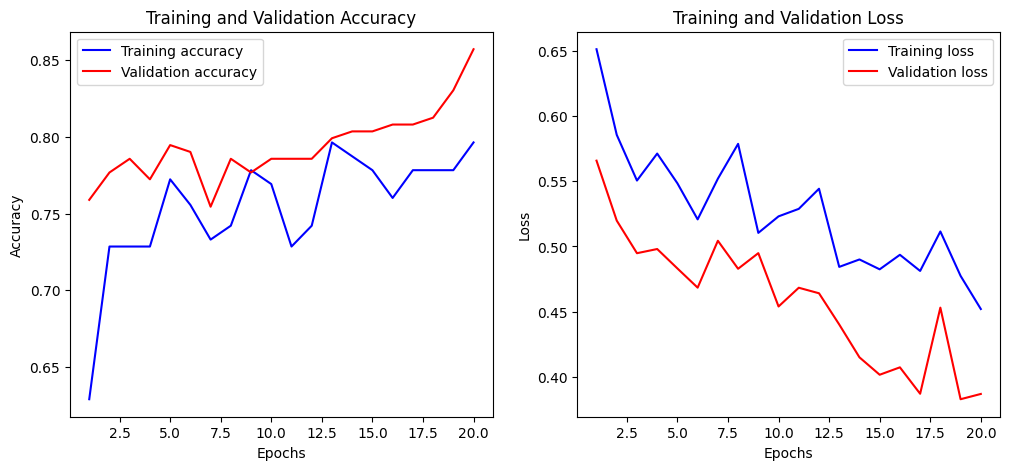

In [31]:

# Plot training history
def plot_training_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'b', label='Training accuracy')
    plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'b', label='Training loss')
    plt.plot(epochs, val_loss, 'r', label='Validation loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

plot_training_history(history)

**Method 2:Functional API Model**

In [32]:
# Model evaluation
accuracy3 = model2.evaluate(valid_generator, steps=valid_generator.samples // batch_size)[1]
print(f"Validation Accuracy (Model 2): {accuracy3 * 100:.2f}")


7/7 [==============================] - 2s 264ms/step - loss: 0.3841 - accuracy: 0.8438
Validation Accuracy (Model 2): 84.38


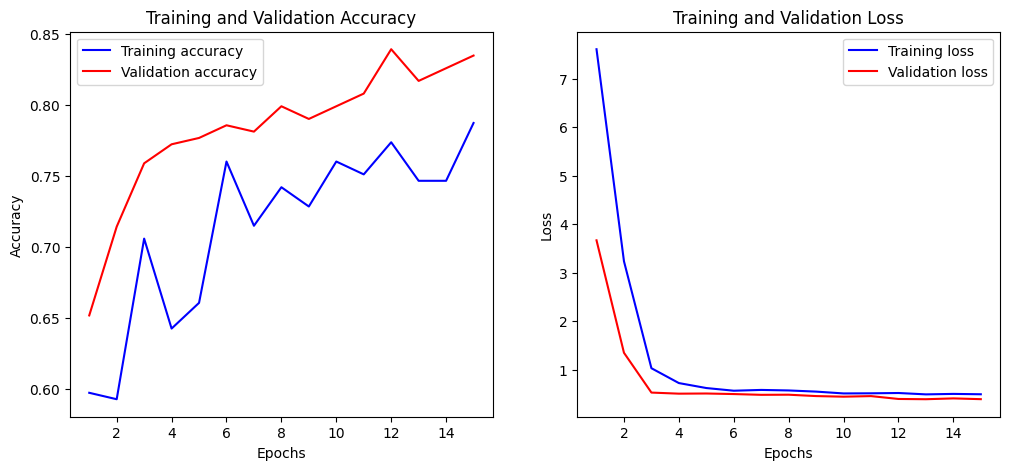

In [34]:
# Plot training history for the second model
plot_training_history(history2)

**Method 3:Advanced CNN Model**

In [45]:
# Evaluate the model
accuracy_advanced_cnn = model3_advanced_cnn.evaluate(valid_generator, steps=valid_generator.samples // batch_size)[1]
print(f"Validation Accuracy (Advanced CNN): {accuracy_advanced_cnn * 100:.2f}%")


7/7 [==============================] - 2s 301ms/step - loss: 0.0102 - accuracy: 1.0000
Validation Accuracy (Advanced CNN): 100.00%


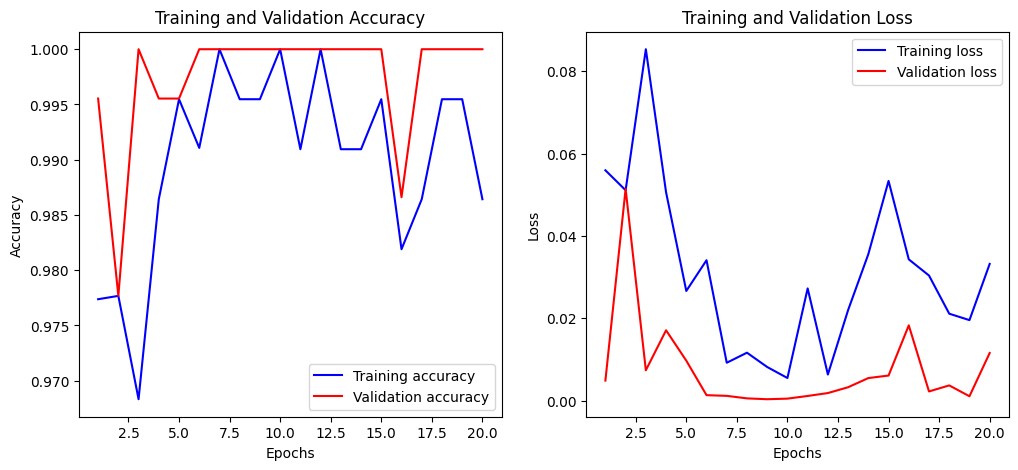

In [46]:
# Plot training history
def plot_training_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'b', label='Training accuracy')
    plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'b', label='Training loss')
    plt.plot(epochs, val_loss, 'r', label='Validation loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

plot_training_history(history_advanced_cnn)


**Method 4:Transfer Learning with DenseNet**

In [42]:
# Evaluate the model
accuracy_densenet = model4_densenet.evaluate(valid_generator, steps=valid_generator.samples // batch_size)[1]
print(f"Validation Accuracy (DenseNet): {accuracy_densenet * 100:.2f}%")


7/7 [==============================] - 7s 885ms/step - loss: 0.1787 - accuracy: 0.9196
Validation Accuracy (DenseNet): 91.96%


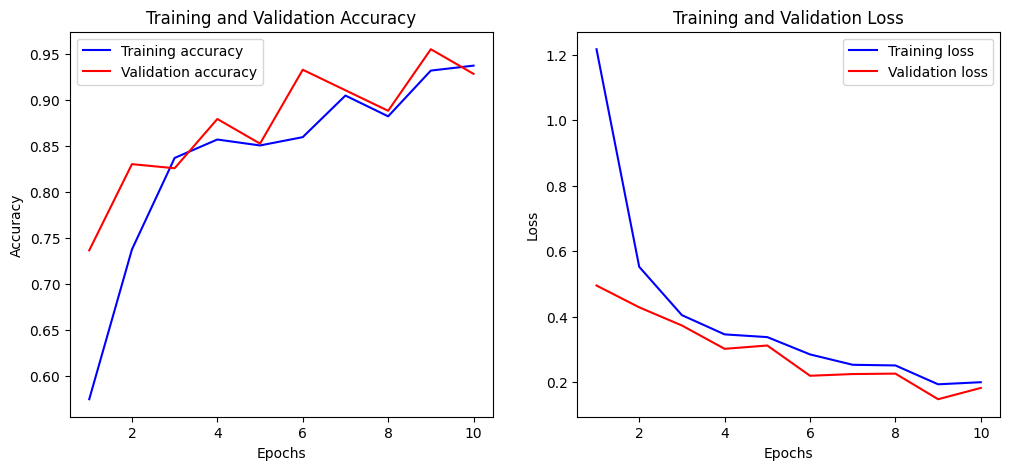

In [43]:
# Plot training history
plot_training_history(history_densenet)